<a href="https://colab.research.google.com/github/PANKAJ-GUPTA-201998/Forcasting/blob/main/cleandata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [145]:
y = pd.read_csv('/content/DATASET.csv')

In [146]:
del y['Timestamp']

In [147]:
df = y.iloc[:4320]

In [148]:
df.mean()

Memory usage [MB]    976.046065
dtype: float64

In [149]:
df.columns =["Production"]

In [150]:
df.head()

,Production
0,1026
1,1070
2,1001
3,969
4,1103


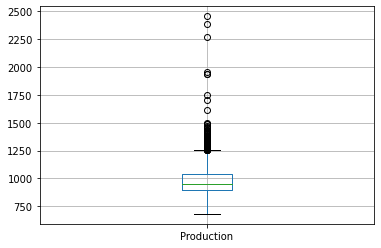

In [151]:
df.boxplot()

In [152]:
import numpy as np

In [153]:
for x in ['Production']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [154]:
df.isnull().sum()

Production    133
dtype: int64

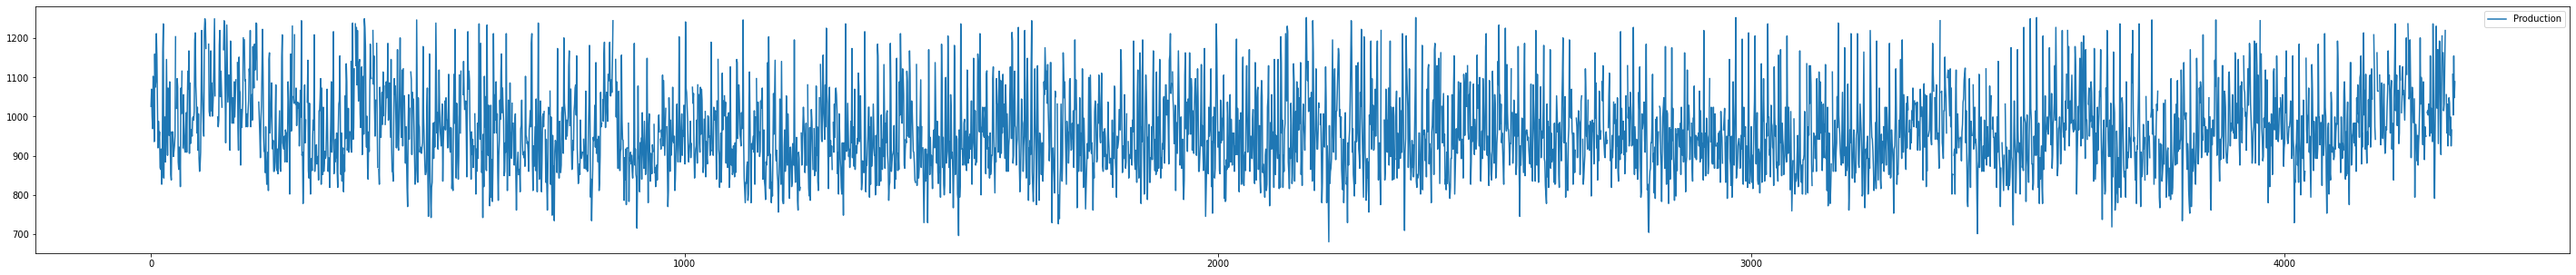

In [155]:
df.plot(figsize=(50,5))

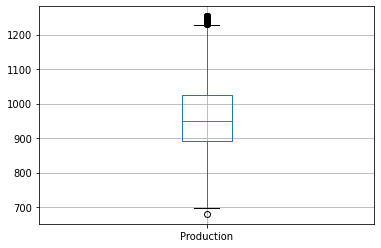

In [156]:
df.boxplot()

In [157]:
df.mean()

Production    963.46716
dtype: float64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  4187 non-null   float64
dtypes: float64(1)
memory usage: 33.9 KB


In [159]:
df.describe()

,Production
count,4187.000000
mean,963.467160
std,105.277912
min,680.000000
25%,890.000000
50%,950.000000
75%,1026.000000
max,1253.000000


In [160]:
df.isnull().sum()


Production    133
dtype: int64

In [161]:
from sklearn.impute import KNNImputer

In [164]:
from fancyimpute import KNN 

In [167]:
missing_col = ['Production']
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [169]:
df.isnull().sum()

Production    0
dtype: int64

In [170]:
df.mean()

Production    963.46716
dtype: float64

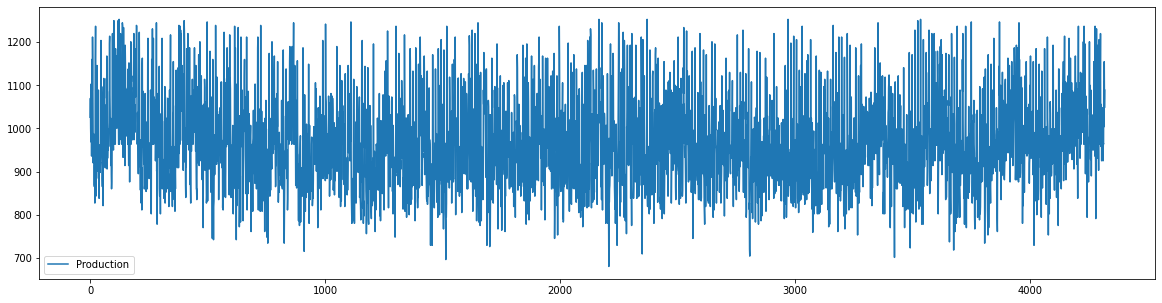

In [172]:
df.plot(figsize=(20,5))

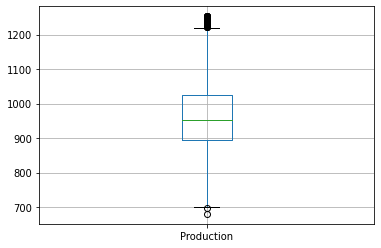

In [173]:
df.boxplot()

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [175]:
len(df)

4320

In [179]:
train = df.iloc[:156]
test = df.iloc[156:]

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.head(),df.tail()

(   Production
 0      1026.0
 1      1070.0
 2      1001.0
 3       969.0
 4      1103.0,       Production
 4315      1108.0
 4316      1004.0
 4317      1155.0
 4318      1048.0
 4319      1089.0)

In [181]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [182]:
scaled_train[:10]

array([[0.47453704],
       [0.57638889],
       [0.41666667],
       [0.34259259],
       [0.65277778],
       [0.56944444],
       [0.2662037 ],
       [0.78472222],
       [0.58796296],
       [0.62037037]])